In [48]:
import numpy as np
import pandas as pd

from utils.timeutil import YearMonth

hst = pd.read_csv(".cache/historical_data.csv", dtype={"code": str})
hst["매수년월"] = hst["매수년월"].apply(lambda x: YearMonth.from_string(x))
hst["매도년월"] = hst["매도년월"].apply(lambda x: YearMonth.from_string(x))
hst = hst[hst["확정실적"].notna()]

# RECIPE ==========================================================

recipes = {
    "벨류": {
        "GP/P": 0.120550,
        "EQ/P": 0.105678,
    },
    "퀄리티": {
        "GP/A": 0.032862,
        "GP/EQ": 0.028487,
        "R/A": 0.012971,
        "GP/R": 0.012141,
        "O/A": 0.009835,
        "E/R": 0.005616,
        "EBT/A": 0.005415,
        "O/EQ": 0.005188,
        "O/R": 0.004577,
        "R/EQ": 0.004484,
        "EBT/R": 0.003881,
        "E/A": 0.003815,
        "EBT/EQ": 0.003162,
        "E/EQ": 0.002940
    },
    "성장": {
        "O_QoQ": 0.027,
        "E_QoQ": 0.024,
        "EBT_QoQ": 0.017,
        "O/A_QoQ": 0.013,
        "E/EQ_QoQ": 0.011,
        "O/EQ_QoQ": 0.01,
        "E/A_QoQ": 0.009,
        "EBT/A_QoQ": 0.008,
        "EBT/EQ_QoQ": 0.006,
        "GP/EQ_QoQ": 0.004,
        "GP/A_QoQ": 0.004,
        "GP_QoQ": 0.003,
        "R_QoQ": 0.001,
        "R/EQ_QoQ": 0.001,
        "R/A_QoQ": 0.001,
    },
    "벨류2": {
        "EQ/P": 1,
        "GP/P": 1,
    },
    "성장2": {
        "O_QoQ": 1,
        "O/EQ_QoQ": 1,
        "O/A_QoQ": 1,

        "E_QoQ": 0.8,
        "E/A_QoQ": 0.8,
        "E/EQ_QoQ": 0.8,

        "GP_QoQ": 0.5,
        "GP/EQ_QoQ": 0.5,
        "GP/A_QoQ": 0.5,
    },
    "가격": {
        "P": -1
    },
    "전략": {
        "성장": 1,
        "벨류": 1,
        "가격": 1
    }
}
# for k1 in ["R", "GP", "O", "EBT", "E"]:
#     recipes[k1 + "성장"] = {
#         k1 + k2 + "_QoQ": 1 for k2 in ["", "/A", "/EQ"]
#     }
# 
# for k1 in ["_QoQ", "/A_QoQ", "/EQ_QoQ"]:
#     recipes[k1 + "성장"] = {
#         k2 + k1: 1 for k2 in ["R", "GP", "O", "EBT", "E"]
#     }
# 
# recipes["신성장"] = {
#     "_QoQ성장": 1,
#     "O성장": 1
# }

# =================================================================

pct_scale = 100
for title, recipe in recipes.items():
    # Calculate recipe
    hst[title] = hst.apply(lambda row: sum([row[f"{k}_pct"] * w for k, w in recipe.items()]), axis=1)

    # Calculate pct
    grouped_by_month = hst.groupby("매도년월")[title]
    rank = grouped_by_month.apply(lambda x: np.ceil(x.rank(pct=True) * pct_scale))
    hst[f"{title}_pct"] = rank.reset_index(level=0, drop=True)

hst

,code,매수년월,매도년월,종목명,매수일,매수가,P,vol,val,shares,...,성장,성장_pct,벨류2,벨류2_pct,성장2,성장2_pct,가격,가격_pct,전략,전략_pct
0,000020,2014-04,2014-05,동화약품,2014-04-30,6000.0,1.675888e+11,1566607.0,9.163852e+09,27931470.0,...,6.819,52.0,161.0,87.0,414.8,60.0,-66.0,35.0,175.0,68.0
1,000040,2014-04,2014-05,KR모터스,2014-04-30,1245.0,1.485800e+11,118231719.0,1.300651e+11,119341379.0,...,10.297,76.0,20.0,6.0,546.2,85.0,-63.0,39.0,120.0,29.0
2,000050,2014-04,2014-05,경방,2014-04-30,133500.0,3.659939e+11,35866.0,4.863769e+09,2741527.0,...,10.752,81.0,135.0,73.0,490.7,74.0,-81.0,20.0,173.0,66.0
4,000070,2014-04,2014-05,삼양홀딩스,2014-04-30,72000.0,5.882735e+11,108108.0,7.798089e+09,8170465.0,...,7.243,55.0,180.0,95.0,440.3,65.0,-87.0,14.0,163.0,58.0
5,000080,2014-04,2014-05,하이트진로,2014-04-30,25000.0,1.753340e+12,5784461.0,1.413551e+11,70133611.0,...,12.185,94.0,123.0,65.0,566.3,89.0,-93.0,8.0,169.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247212,950140,2023-11,2023-12,잉글우드랩,2023-11-30,12300.0,2.443748e+11,5640377.0,7.845933e+10,19867866.0,...,12.090,92.0,62.0,27.0,621.5,95.0,-70.0,32.0,152.0,49.0
247213,950160,2023-11,2023-12,코오롱티슈진,2023-11-30,8850.0,6.434436e+11,1109064.0,9.611883e+09,72705495.0,...,4.556,31.0,12.0,3.0,300.2,42.0,-86.0,15.0,49.0,4.0
247215,950190,2023-11,2023-12,고스트스튜디오,2023-11-30,10860.0,1.474776e+11,387124.0,4.078192e+09,13579892.0,...,8.825,66.0,118.0,61.0,412.1,61.0,-56.0,46.0,175.0,66.0
247216,950200,2023-11,2023-12,소마젠,2023-11-30,5230.0,1.005523e+11,485755.0,2.529368e+09,19226053.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-43.0,60.0,NaN,NaN


In [49]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = '../res/font/Gothic_A1/GothicA1-Medium.ttf'
font_manager.fontManager.addfont(font_path)
font_name = font_manager.fontManager.ttflist[-1].name
plt.rc("font", family=font_name)
plt.rc('axes', unicode_minus=False)
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
plt.rcParams['agg.path.chunksize'] = 10_000

In [55]:
import pandas as pd
from sklearn.linear_model import LinearRegression


def cagr_corr_by_rank(factor: str, graph: bool = False):
    returns = hst.groupby("매도년월").apply(lambda x: x.groupby(f"{factor}_pct")["수익률"].mean())
    if type(returns) is pd.Series:
        returns = returns.to_frame().reset_index().pivot(index="매도년월", columns=f"{factor}_pct")
        returns = returns.droplevel(level=0, axis=1)

    years = returns.index.min().duration(returns.index.max())
    cagr_by_rank = (returns + 1).prod() ** (1 / years) - 1
    corr_by_month = returns.apply(lambda x: x.corr(pd.Series(x.index), method="spearman"), axis=1)
    # TODO: 상위 30%, 하위 30% 차이

    cum = (returns + 1).cumprod()
    dd = cum / cum.cummax() - 1
    mdd = dd.min()
    model = LinearRegression()
    model.fit(
        cagr_by_rank.index.to_frame(),
        cagr_by_rank.values
    )
    coef = model.coef_[0]

    if graph:
        fig, axes = plt.subplots(nrows=1, ncols=2)
        fig.set_figwidth(20), fig.set_figheight(6)

        axes[0].set_title(f"CAGR by {factor} rank")
        axes[0].bar(cagr_by_rank.index, cagr_by_rank.values)
        axes[0].plot(cagr_by_rank.index, model.predict(cagr_by_rank.index.to_frame("test")))

        axes[1].set_title(f"Monthly {factor} Correlation")
        axes[1].bar([str(i) for i in corr_by_month.index], corr_by_month.values)
        axes[1].set_xticks(np.quantile(np.arange(0, len(corr_by_month)), [1 * i / 10 for i in range(10)] + [1]))

    return pd.Series({
        "cagr_corr": cagr_by_rank.to_frame(factor).reset_index().corr("spearman").loc[f"{factor}_pct", factor],
        "cagr_coef": coef,
        "cagr_corr_std": corr_by_month.std(),
        "mdd_corr": mdd.to_frame("mdd").reset_index().corr("spearman").loc[f"{factor}_pct", "mdd"]
    })


factors = [col.split("_pct")[0] for col in hst.columns if col.endswith("_pct")]
factors = factors[:5]  # fixme
df = pd.DataFrame(
    pd.Series(factors).apply(cagr_corr_by_rank),
    index=factors
)
df

/Users/jowookjae/opt/anaconda3/envs/deepquant/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/jowookjae/opt/anaconda3/envs/deepquant/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/jowookjae/opt/anaconda3/envs/deepquant/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/jowookjae/opt/anaconda3/envs/deepquant/lib/python3.10/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/jowookjae/opt/anaconda3/envs/deepquant/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  

KeyboardInterrupt: 

cagr_corr        0.758188
cagr_coef        0.003756
cagr_corr_std    0.347153
mdd_corr         0.617402
dtype: float64

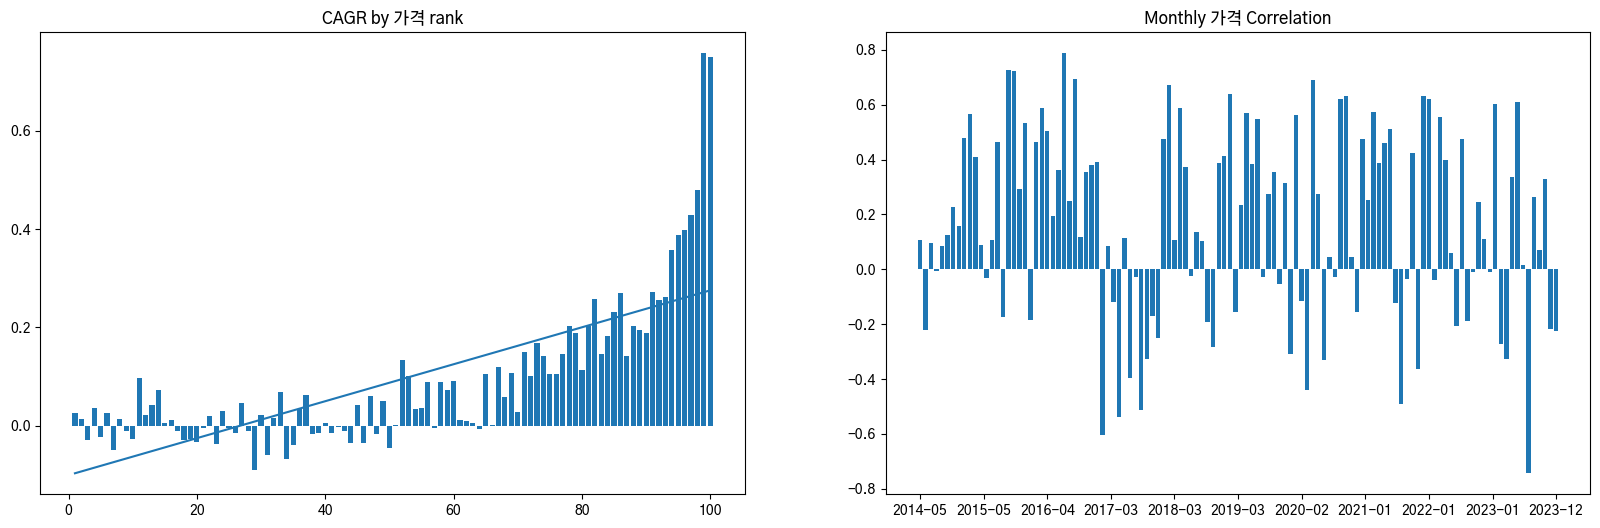

In [51]:
cagr_corr_by_rank("가격", graph=True)

In [52]:
# import pandas as pd
# 
# x_factors = ["O_QoQ_pct", "O/A_pct", "O/EQ_pct"]
# print(x_factors)
# y_factor = "수익률_pct"
# data = hst[x_factors + [y_factor]].dropna()
# X = data[x_factors]
# y = data[y_factor]
# model = LinearRegression()
# model.fit(X, y)
# 
# pd.DataFrame({"factors": x_factors, "coef": model.coef_}).sort_values("coef", ascending=False)